In [ ]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import Adam
from keras import backend as K
import matplotlib.pyplot as plt

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    
        self.epsilon = 1.0 
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.997
        self.learning_rate = 0.002
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=2))
        model.add(Activation('relu'))

        model.add(Dense(64))
        model.add(Activation('relu'))

        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss="mean_squared_error",
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        mini_batch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in mini_batch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                target_futue  = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(target_futue)
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save(self, name):
        self.model.save(name)

EPISODES = 5
i=6
if __name__ == "__main__":
    env = gym.make('MountainCar-v0')
    env.reset()
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    done = False
    batch_size = 3

    scores = 0
    total_scores=[]
    eps_decay=[]
    while i is not 1:
      i-=1
      for e in range(EPISODES):
          state = env.reset()
          state = np.reshape(state, [1, state_size])
          flag = 0
          for time in range(20):
              eps_decay.append(agent.epsilon)
              action = agent.act(state)
              next_state, reward, done, info = env.step(action)
              
              if next_state[1] > state[0][1] and next_state[1]>0 and state[0][1]>0:
                  reward += 10
              elif next_state[1] < state[0][1] and next_state[1]<=0 and state[0][1]<=0:
                  reward +=10
              if done:
                  reward = reward + 100
              else:
                
                  reward = reward - 10  
              next_state = np.reshape(next_state, [1, state_size])
              agent.remember(state, action, reward, next_state, done)
              state = next_state
              scores += reward
              print("episode: {}/{}, score: {}, e: {:.2}"
                        .format(e, EPISODES, scores, agent.epsilon))
              if done:
                  agent.update_target_model()
                  print("episode: {}/{}, score: {}, e: {:.2}"
                        .format(e, EPISODES, scores, agent.epsilon))
                  break
              total_scores.append(scores)
              if len(agent.memory) > batch_size:
                  agent.replay(batch_size)
    i=i-1  

episode: 0/5, score: -1.0, e: 1.0
episode: 0/5, score: -2.0, e: 1.0
episode: 0/5, score: -13.0, e: 1.0
episode: 0/5, score: -24.0, e: 1.0
1/1 [==============================] - 0s 60ms/step


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/ker

1/1 [==============================] - 0s 45ms/step
episode: 0/5, score: -25.0, e: 1.0
1/1 [==============================] - 0s 55ms/step
episode: 0/5, score: -36.0, e: 0.99
1/1 [==============================] - 0s 28ms/step
episode: 0/5, score: -47.0, e: 0.99
1/1 [==============================] - 0s 21ms/step
episode: 0/5, score: -48.0, e: 0.99
1/1 [==============================] - 0s 17ms/step
episode: 0/5, score: -59.0, e: 0.99
1/1 [==============================] - 0s 19ms/step
episode: 0/5, score: -70.0, e: 0.98
1/1 [==============================] - 0s 23ms/step
episode: 0/5, score: -71.0, e: 0.98
1/1 [==============================] - 0s 17ms/step
episode: 0/5, score: -82.0, e: 0.98
1/1 [==============================] - 0s 18ms/step
episode: 0/5, score: -83.0, e: 0.97
1/1 [==============================] - 0s 18ms/step
episode: 0/5, score: -94.0, e: 0.97
1/1 [==============================] - 0s 21ms/step
episode: 0/5, score: -105.0, e: 0.97
1/1 [===========================

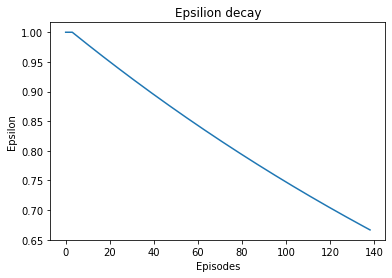

In [ ]:
import matplotlib.pyplot as plt
plt.plot(eps_decay, label = "Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilion decay")
plt.show()

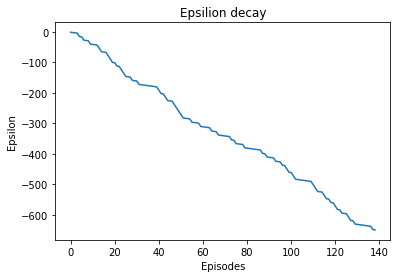

In [ ]:
plt.plot(total_scores, label = "Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilion decay")
plt.show()